<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/MLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is adopted from:


https://python-course.eu/machine-learning/neural-networks-with-scikit.php




Let's do a correct classification


In [59]:
from  sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

In [60]:
# Load IRIS
X, y = datasets.load_iris(return_X_y=True)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123, shuffle=True, stratify=y)

We will create now a **MLPClassifier**.

A few notes on the used parameters:

*hidden_layer_sizes*: `tuple, length` = *n_layers* - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.
(6,) means one hidden layer with 6 neurons.

*solver*:
The weight optimization can be influenced with the solver parameter. Three solver modes are available

'`lbfgs`' - is an optimizer in the family of quasi-Newton methods.

'`sgd`' - refers to stochastic gradient descent.

'`adam`' - refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.

Without understanding in the details of the solvers, you should know the following: 'adam' works pretty well - both training time and validation score - on relatively large datasets, i.e. thousands of training samples or more. For small datasets, however, 'lbfgs' can converge faster and perform better.

'`alpha`' - This parameter can be used to control possible '*overfitting*' and 'underfitting'. We will cover it in detail further down.

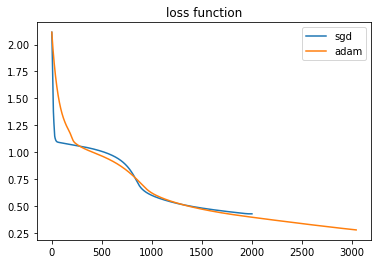

In [62]:
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, learning_rate_init=0.001, learning_rate='adaptive',alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=5000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train, y_train)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

In [63]:
#lbfgs test
y_pred = clf_lb.predict(X_test)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)


print('lbfgs = ', scores_clf_lb, ";  sgd = ", scores_clf_sgd, "; adam = ", scores_clf_adam )


lbfgs =  0.9666666666666667 ;  sgd =  0.8333333333333334 ; adam =  0.95


What is the influence of space scaling?

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)


lbfgs_mm =  0.9666666666666667 ;  sgd_mm =  0.8 ; adam_mm =  0.9333333333333333


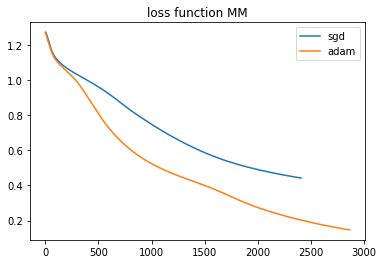

In [65]:
# Min-Max scaler
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_mm, y_train)
#lbfgs test
y_pred = clf_lb.predict(X_test_mm)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test_mm)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test_mm)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function MM')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

print('lbfgs_mm = ', scores_clf_lb, ";  sgd_mm = ", scores_clf_sgd, "; adam_mm = ", scores_clf_adam )

lbfgs_std =  0.9666666666666667 ;  sgd_std =  0.9 ; adam_std =  0.9333333333333333


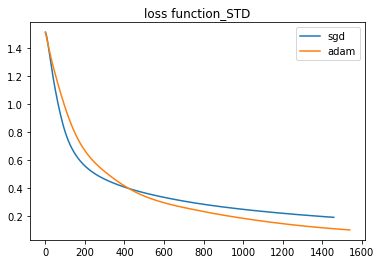

In [66]:
# Standartisation scaler
# Comparing the optimizers for network with 6 neurons in hiden layer
clf_lb = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
clf_sgd = MLPClassifier(solver='sgd', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
clf_adam = MLPClassifier(solver='adam', max_iter=3000, alpha=1e-5, hidden_layer_sizes=(6,), random_state=123).fit(X_train_std, y_train)
#lbfgs test
y_pred = clf_lb.predict(X_test_std)
scores_clf_lb=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_sgd.predict(X_test_std)
scores_clf_sgd=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_adam.predict(X_test_std)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)

plt.plot(clf_sgd.loss_curve_)
plt.title('loss function_STD')
plt.plot(clf_adam.loss_curve_)
plt.legend(['sgd','adam'])

print('lbfgs_std = ', scores_clf_lb, ";  sgd_std = ", scores_clf_sgd, "; adam_std = ", scores_clf_adam )

The scaling may improve the classification result.


How about neuron activation function?

In [67]:
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Comparing the optimizers for network with 6 neurons in hiden layer
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
clf_relu = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
clf_logistic = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
clf_identity = MLPClassifier(solver='lbfgs', activation='identity', alpha=1e-5, hidden_layer_sizes=(3,), random_state=123).fit(X_train_std, y_train)
#lbfgs test
y_pred = clf_relu.predict(X_test_std)
scores_clf_relu=metrics.accuracy_score(y_test,y_pred)

#sgd test
y_pred = clf_logistic.predict(X_test_std)
scores_clf_logistic=metrics.accuracy_score(y_test,y_pred)

#adam test
y_pred = clf_identity.predict(X_test_std)
scores_clf_adam=metrics.accuracy_score(y_test,y_pred)


print('relu = ', scores_clf_relu, ";  logistic = ", scores_clf_logistic, "; identity = ", scores_clf_adam )

relu =  0.9666666666666667 ;  logistic =  0.9333333333333333 ; identity =  0.9666666666666667


In [68]:
from sklearn.model_selection import GridSearchCV
  
#mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(3,2) ,(3,) ,(10,)],
    'activation': ['identity', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf_logistic, parameter_space, refit = True, cv=5, verbose=3)
grid.fit(X_train_std, y_train) # X is train samples and y is the corresponding labels

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.944 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 3/5] END activati

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.944 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.944 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.944 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=0.944 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.944 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=0.944 total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3, 2), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=1.000 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.944 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=constant;, score=0.944 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(3,), learning_rate=adaptive;, score=0.944 total time=   0.0s
[CV 2/5] END

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=constant;, score=1.000 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=constant;, score=0.944 total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=0.944 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=1.000 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=0.944 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(10,), learning_rate=adaptive;, score=0.944 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='logistic', alpha=1e-05,
                                     hidden_layer_sizes=(3,), random_state=123,
                                     solver='lbfgs'),
             param_grid={'activation': ['identity', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(3, 2), (3,), (10,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=3)

In [69]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant'}
MLPClassifier(activation='identity', hidden_layer_sizes=(3, 2),
              random_state=123, solver='lbfgs')
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'constant'}
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 2), 'learning_rate': 'adaptive'}
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant'}
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (3,), 'learning_rate': 'adaptive'}
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.978 (+/-0.054) for {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.978 (+/-0.054) for {'activation': 'identity',

In [70]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_std)

scores=metrics.accuracy_score(y_test,grid_predictions)  
print('ACC = ', scores)
# print classification report
print(classification_report(y_test, grid_predictions))

ACC =  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        20
           2       0.91      1.00      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


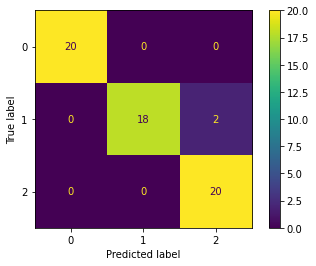

In [71]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_std, y_test)  
plt.show()